In [1]:
import requests
import json
import pandas as pd

response = requests.get('https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json')
data = response.json()

attributes = ['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy', 'candy_count', 'egg', 'spawn_chance',
              'avg_spawns', 'spawn_time', 'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution']

# Create an empty list to store the extracted data
pokemon_data = []

# Iterate over each Pokemon record and extract the desired attributes
#These nested loops iterate over each Pokémon record in the data dictionary and extract the desired attributes. 
#If the attribute exists in the Pokémon record, it is stored in the extracted_data dictionary. 
#If the attribute is a list, it is joined into a string using ", ". 
#For attributes 'multipliers', 'next_evolution', and 'prev_evolution', special handling is applied. 
#If the attribute does not exist in the Pokémon record, None is stored. 
#The extracted data for each Pokémon is then appended to the pokemon_data list.
for pokemon in data['pokemon']:
    extracted_data = {}
    for attribute in attributes:
        if attribute in pokemon:
            if isinstance(pokemon[attribute], list):
                if attribute == 'multipliers':
                    extracted_data[attribute] = ", ".join(str(entry) for entry in pokemon[attribute])
                elif attribute in ['next_evolution', 'prev_evolution']:
                    extracted_data[attribute] = ", ".join([f"{entry['num']} - {entry['name']}" for entry in pokemon[attribute]])
                else:
                    extracted_data[attribute] = ", ".join(pokemon[attribute])
            else:
                extracted_data[attribute] = pokemon[attribute]
        else:
            extracted_data[attribute] = None
    pokemon_data.append(extracted_data)

# Create a DataFrame from the extracted data
df = pd.DataFrame(pokemon_data)

# Save DataFrame to a CSV file
df.to_csv('pokemon_data.csv', index=False)

print("Data saved as 'pokemon_data.csv'")


Data saved as 'pokemon_data.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/pokemon_data.csv')

In [4]:
data.head(50)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.000,20:00,1.58,"Fire, Ice, Flying, Psychic","002 - Ivysaur, 003 - Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.200,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",003 - Venusaur,001 - Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.700,11:30,NaN,"Fire, Ice, Flying, Psychic",NaN,"001 - Bulbasaur, 002 - Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.300,08:45,1.65,"Water, Ground, Rock","005 - Charmeleon, 006 - Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.200,19:00,1.79,"Water, Ground, Rock",006 - Charizard,004 - Charmander
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.310,13:34,NaN,"Water, Electric, Rock",NaN,"004 - Charmander, 005 - Charmeleon"
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.000,04:25,2.1,"Electric, Grass","008 - Wartortle, 009 - Blastoise",NaN
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,Water,0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.400,07:02,1.4,"Electric, Grass",009 - Blastoise,007 - Squirtle
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,0.0067,0.670,00:06,NaN,"Electric, Grass",NaN,"007 - Squirtle, 008 - Wartortle"
9,10,10,Caterpie,http://www.serebii.net/pokemongo/pokemon/010.png,Bug,0.30 m,2.9 kg,Caterpie Candy,12.0,2 km,3.0320,303.200,16:35,1.05,"Fire, Flying, Rock","011 - Metapod, 012 - Butterfree",NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    int64  
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      145 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(2), object(12)

#EXPLORATORY DATA ANALYSIS

In [6]:
# Finding Null Values
data.isnull().sum()

id                 0
num                0
name               0
img                0
type               0
height             0
weight             0
candy              0
candy_count       81
egg                0
spawn_chance       0
avg_spawns         0
spawn_time         6
multipliers       81
weaknesses         0
next_evolution    81
prev_evolution    79
dtype: int64

In [7]:
data.shape

(151, 17)

In [8]:
null_var=data.isnull().sum()/data.shape[0]*100
null_var

id                 0.000000
num                0.000000
name               0.000000
img                0.000000
type               0.000000
height             0.000000
weight             0.000000
candy              0.000000
candy_count       53.642384
egg                0.000000
spawn_chance       0.000000
avg_spawns         0.000000
spawn_time         3.973510
multipliers       53.642384
weaknesses         0.000000
next_evolution    53.642384
prev_evolution    52.317881
dtype: float64

<Axes: >

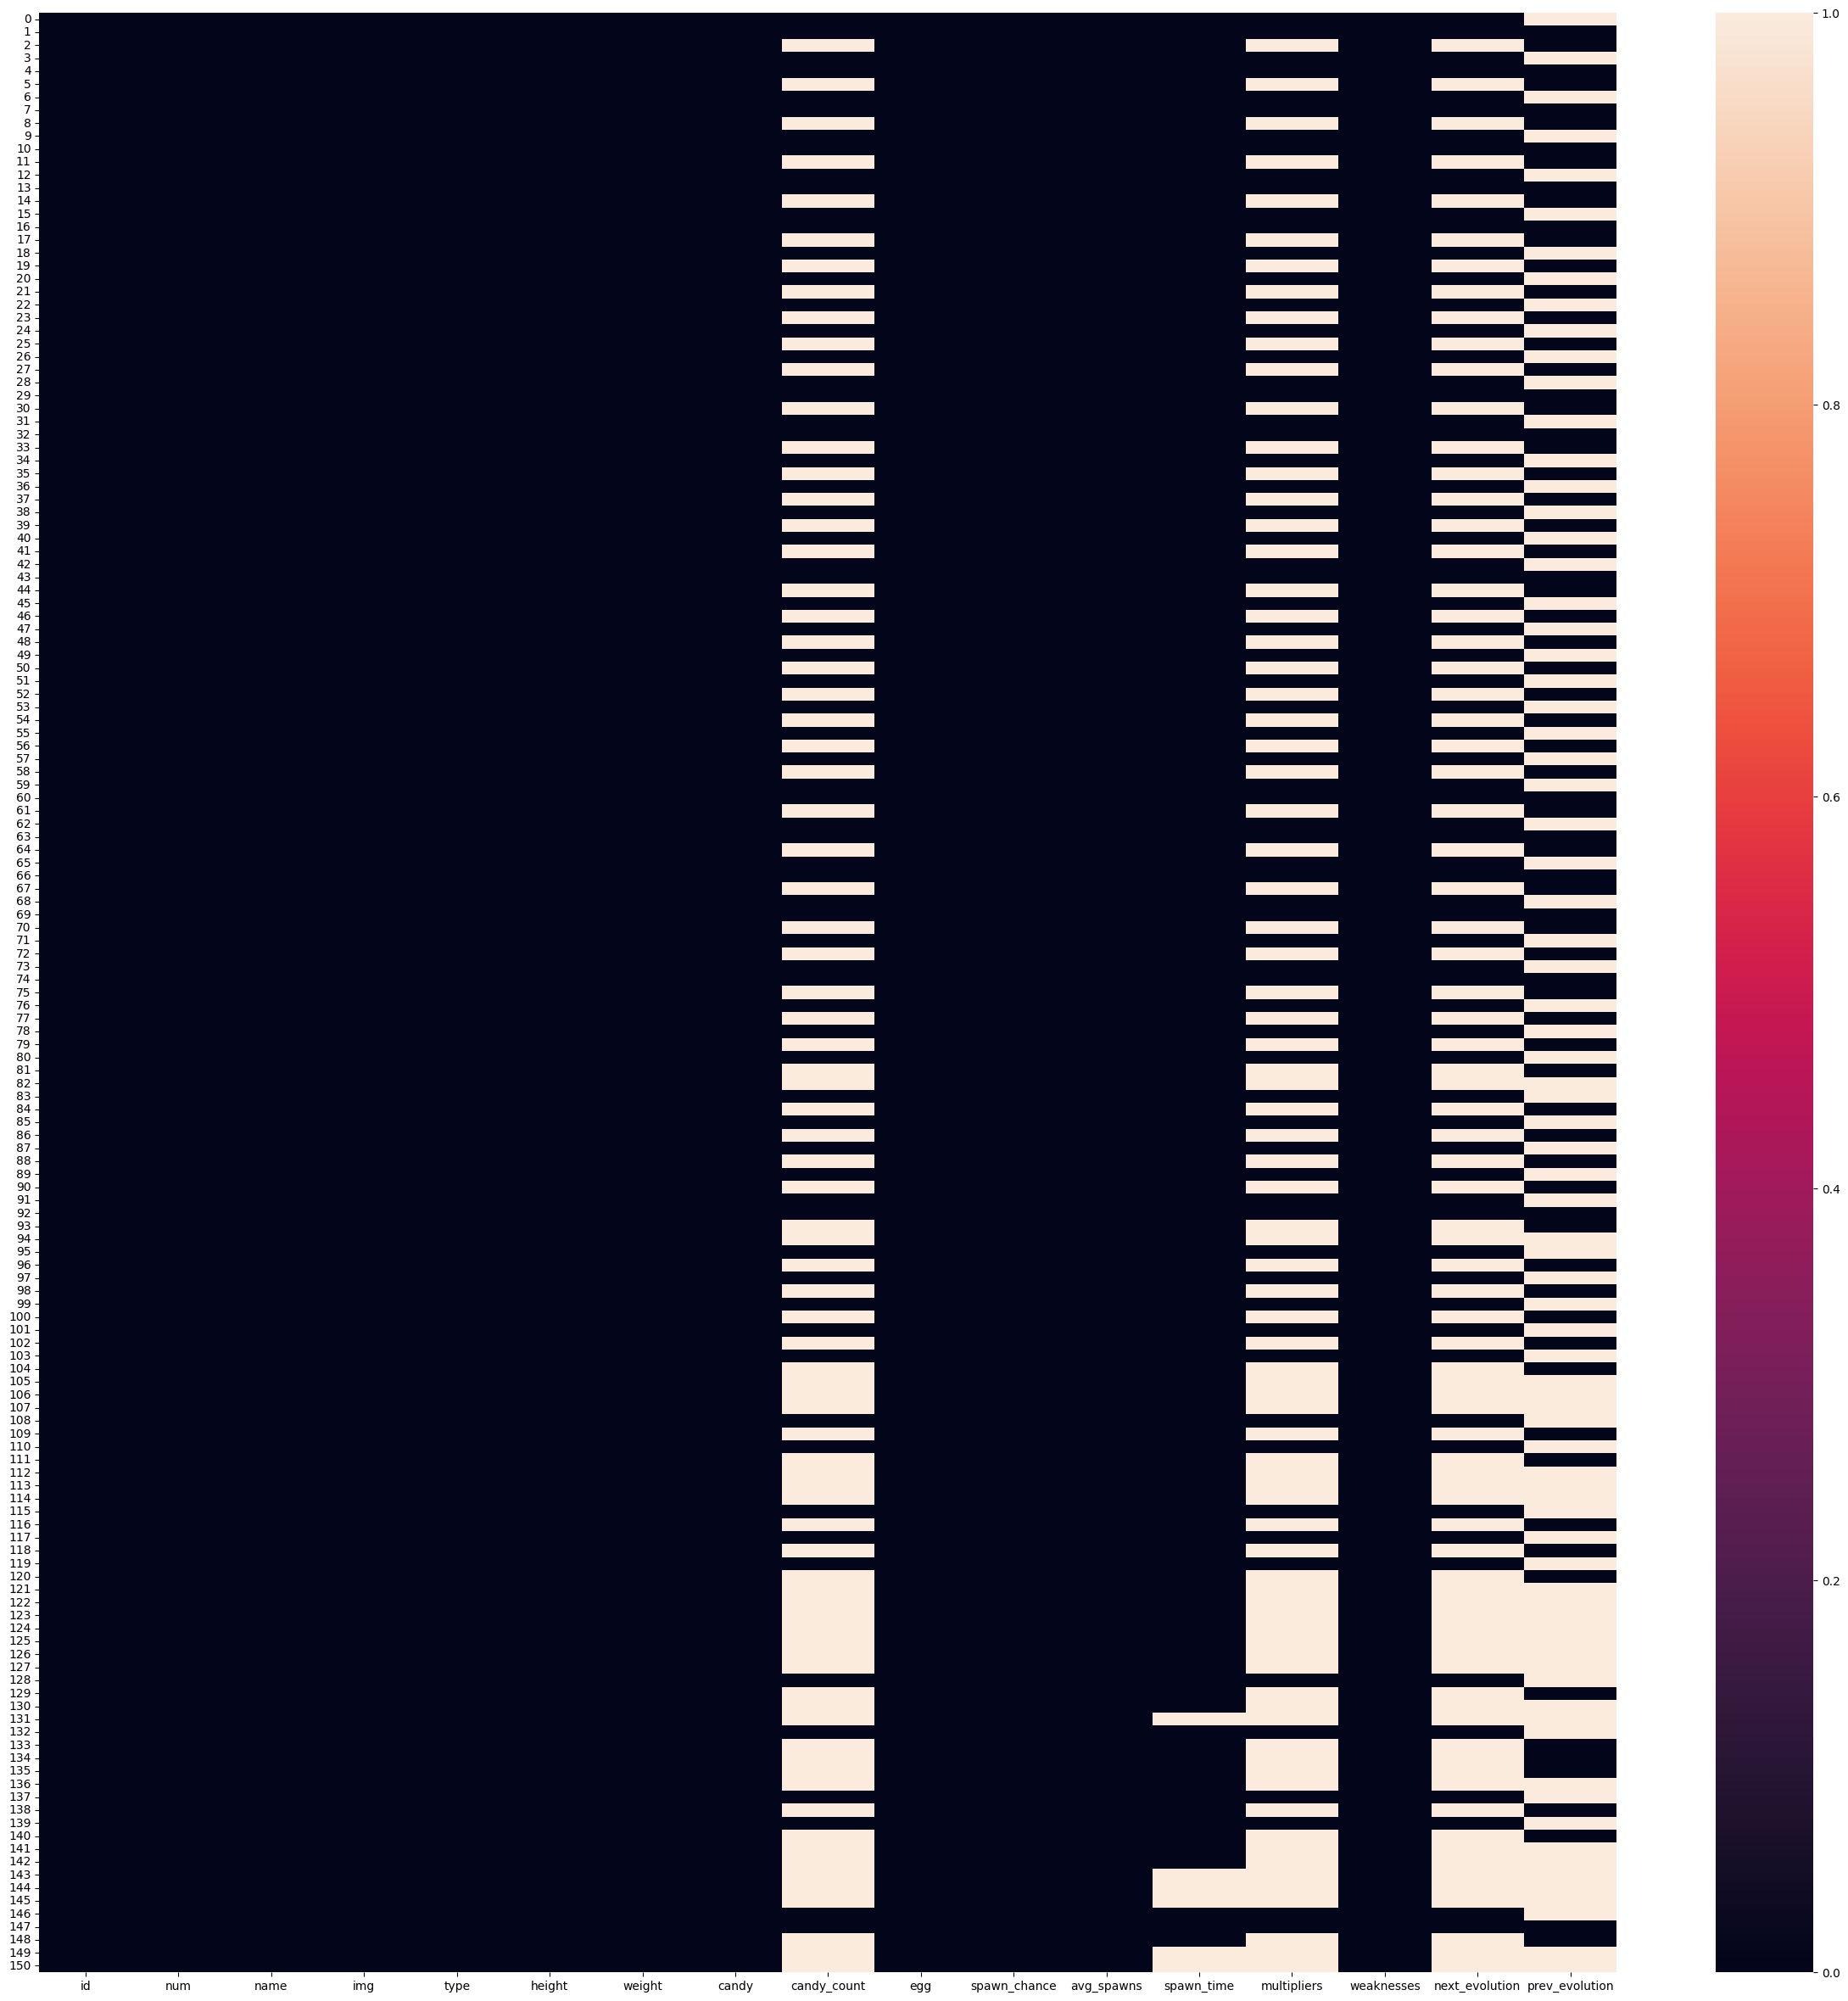

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(data.isnull())

In [10]:
# There are approximately 53% null values present in 'candy_count', 'multipliers','next_evolution', 'prev_evolution'
     #---So, we will impute values in these columns
# The "spawn_time" column has only 3% null values.So, we can remove these null values

In [11]:
# removing 'multipliers' column
data2=data.drop(columns=('multipliers'))

In [12]:
#filling 'candy_count' column with median values

In [13]:
data2['candy_count'].fillna(data2['candy_count'].median(), inplace=True)

In [14]:
data2.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,"Fire, Ice, Flying, Psychic","002 - Ivysaur, 003 - Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"Fire, Ice, Flying, Psychic",003 - Venusaur,001 - Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,50.0,Not in Eggs,0.017,1.7,11:30,"Fire, Ice, Flying, Psychic",NaN,"001 - Bulbasaur, 002 - Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,"Water, Ground, Rock","005 - Charmeleon, 006 - Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,"Water, Ground, Rock",006 - Charizard,004 - Charmander


In [15]:
# The columns-'next_evolution' and 'prev_evolution' are object type data. So, they will be filled by mode
list1 = ['next_evolution', 'prev_evolution']
for var in list1:
    data2[var].fillna(data2[var].mode()[0], inplace=True)


In [16]:
data2.isnull().sum()

id                0
num               0
name              0
img               0
type              0
height            0
weight            0
candy             0
candy_count       0
egg               0
spawn_chance      0
avg_spawns        0
spawn_time        6
weaknesses        0
next_evolution    0
prev_evolution    0
dtype: int64

In [17]:
# Removing the null values

In [18]:
data_final=data2.dropna()

In [19]:
data_final.isnull().sum()

id                0
num               0
name              0
img               0
type              0
height            0
weight            0
candy             0
candy_count       0
egg               0
spawn_chance      0
avg_spawns        0
spawn_time        0
weaknesses        0
next_evolution    0
prev_evolution    0
dtype: int64

In [20]:
data_final.shape

(145, 16)

In [21]:
#Data is cleaned now.
#But, I will get all the insights in our old data.

In [22]:
#1. Get all Pokemons whose spawn rate is less than 5%
sp_data=data[data['spawn_chance']<0.05]
sp_data

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",003 - Venusaur,001 - Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"Fire, Ice, Flying, Psychic",NaN,"001 - Bulbasaur, 002 - Ivysaur"
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,1.79,"Water, Ground, Rock",006 - Charizard,004 - Charmander
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"Water, Electric, Rock",NaN,"004 - Charmander, 005 - Charmeleon"
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,Water,0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,1.4,"Electric, Grass",009 - Blastoise,007 - Squirtle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire, Flying",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Water, Electric, Rock",NaN,NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,2.05,"Ice, Dragon, Fairy",149 - Dragonite,147 - Dratini
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"Ice, Rock, Dragon, Fairy",NaN,"147 - Dratini, 148 - Dragonair"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Bug, Ghost, Dark",NaN,NaN


In [23]:

#2.Get all Pokemons that have less than 4 weaknesses
weak_data = data[data['weaknesses'].apply(lambda x: len(x.split(', '))) < 4]
weak_data

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,1.65,"Water, Ground, Rock","005 - Charmeleon, 006 - Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,1.79,"Water, Ground, Rock",006 - Charizard,004 - Charmander
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"Water, Electric, Rock",NaN,"004 - Charmander, 005 - Charmeleon"
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.00,04:25,2.1,"Electric, Grass","008 - Wartortle, 009 - Blastoise",NaN
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,Water,0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,1.4,"Electric, Grass",009 - Blastoise,007 - Squirtle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire, Flying",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Water, Electric, Rock",NaN,NaN
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"1.83, 1.84","Ice, Dragon, Fairy","148 - Dragonair, 149 - Dragonite",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,2.05,"Ice, Dragon, Fairy",149 - Dragonite,147 - Dratini
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Bug, Ghost, Dark",NaN,NaN


In [24]:
#3.Get all Pokemons that have no multipliers at all
data.head()
no_multiplier_data = data[data['multipliers'].isnull()]
no_multiplier_data


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"Fire, Ice, Flying, Psychic",NaN,"001 - Bulbasaur, 002 - Ivysaur"
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"Water, Electric, Rock",NaN,"004 - Charmander, 005 - Charmeleon"
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,0.0067,0.67,00:06,NaN,"Electric, Grass",NaN,"007 - Squirtle, 008 - Wartortle"
11,12,12,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"Bug, Flying",1.09 m,32.0 kg,Caterpie Candy,NaN,Not in Eggs,0.0220,2.20,05:23,NaN,"Fire, Electric, Ice, Flying, Rock",NaN,"010 - Caterpie, 011 - Metapod"
14,15,15,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"Bug, Poison",0.99 m,29.5 kg,Weedle Candy,NaN,Not in Eggs,0.0510,5.10,04:50,NaN,"Fire, Flying, Psychic, Rock",NaN,"013 - Weedle, 014 - Kakuna"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"Electric, Flying",1.60 m,52.6 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Ice, Rock",NaN,NaN
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire, Flying",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Water, Electric, Rock",NaN,NaN
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"Ice, Rock, Dragon, Fairy",NaN,"147 - Dratini, 148 - Dragonair"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Bug, Ghost, Dark",NaN,NaN


In [27]:
#4.Get all Pokemons that do not have more than 2 evolutions
evol_data = data[data['next_evolution'].apply(lambda x: len(str(x).split(', '))) > 2]
evol_data

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
132,133,133,Eevee,http://www.serebii.net/pokemongo/pokemon/133.png,Normal,0.30 m,6.5 kg,Eevee Candy,25.0,10 km,2.75,275.0,05:32,"2.02, 2.64",Fighting,"134 - Vaporeon, 135 - Jolteon, 136 - Flareon",NaN


In [32]:
#5. Get all Pokemons whose spawn time is less than 300 seconds.


In [31]:

data.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,1.58,"Fire, Ice, Flying, Psychic","002 - Ivysaur, 003 - Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",003 - Venusaur,001 - Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"Fire, Ice, Flying, Psychic",NaN,"001 - Bulbasaur, 002 - Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,1.65,"Water, Ground, Rock","005 - Charmeleon, 006 - Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,1.79,"Water, Ground, Rock",006 - Charizard,004 - Charmander


In [33]:
#Get all Pokemon who have more than two types of capabilities

In [39]:
type_data = data[data['type'].str.split(', ').str.len() >2]
type_data
# Answer: There are no pokemons who have more than 2 types of capabilities

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
